In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Sample - Superstore.csv", encoding="latin1")
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [53]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'] = df['Order Date'].dt.strftime('%y-%m-%d') 
print(df)

      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   16-11-08  11/11/2016    Second Class   
1          2  CA-2016-152156   16-11-08  11/11/2016    Second Class   
2          3  CA-2016-138688   16-06-12   6/16/2016    Second Class   
3          4  US-2015-108966   15-10-11  10/18/2015  Standard Class   
4          5  US-2015-108966   15-10-11  10/18/2015  Standard Class   
...      ...             ...        ...         ...             ...   
9989    9990  CA-2014-110422   14-01-21   1/23/2014    Second Class   
9990    9991  CA-2017-121258   17-02-26    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   17-02-26    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   17-02-26    3/3/2017  Standard Class   
9993    9994  CA-2017-119914   17-05-04    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States      

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,16-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,16-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,16-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,15-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,15-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
df.Sales.sum()

np.float64(2297200.8603000003)

In [36]:
top_customers = df.groupby("Customer Name")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False).head(10)
print(top_customers)

                        Sales     Profit
Customer Name                           
Sean Miller         25043.050 -1980.7393
Tamara Chand        19052.218  8981.3239
Raymond Buch        15117.339  6976.0959
Tom Ashbrook        14595.620  4703.7883
Adrian Barton       14473.571  5444.8055
Ken Lonsdale        14175.229   806.8550
Sanjit Chand        14142.334  5757.4119
Hunter Lopez        12873.298  5622.4292
Sanjit Engle        12209.438  2650.6769
Christopher Conant  12129.072  2177.0493


In [14]:
product_popularity=df.groupby("Product Name")[["Sales"]].sum().sort_values(by="Product Name",ascending=True).head(10)

In [15]:
product_popularity

,Sales
Product Name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.688
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",176.288
#6 3/4 Gummed Flap White Envelopes,71.280
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",2706.080


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7732\3727306413.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum()


Text(0, 0.5, 'Trend')

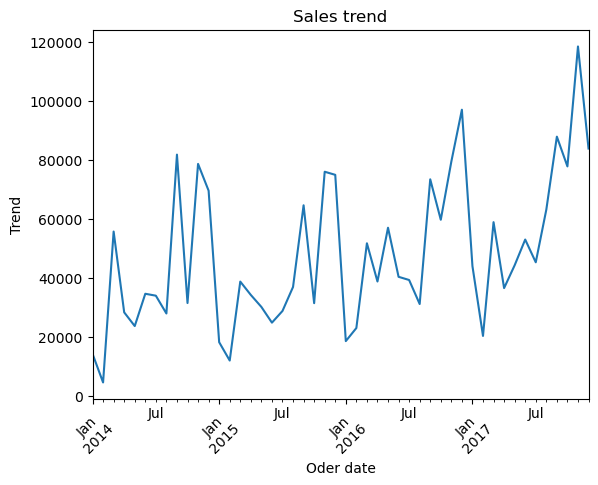

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  
monthly_sales = df.set_index('Order Date')['Sales'].resample('M').sum()
monthly_sales.plot()
plt.title("Sales trend")
plt.xticks (rotation=45)
plt.xlabel("Oder date")
plt.ylabel("Trend")

Text(0.5, 1.0, 'Category wise sales')

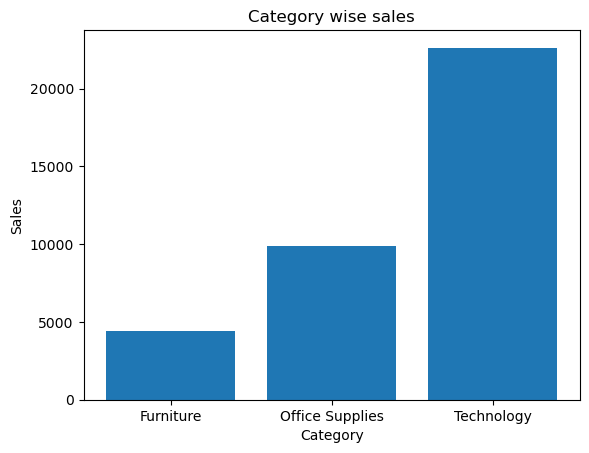

In [12]:
plt.bar(df["Category"],df["Sales"])
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Category wise sales")

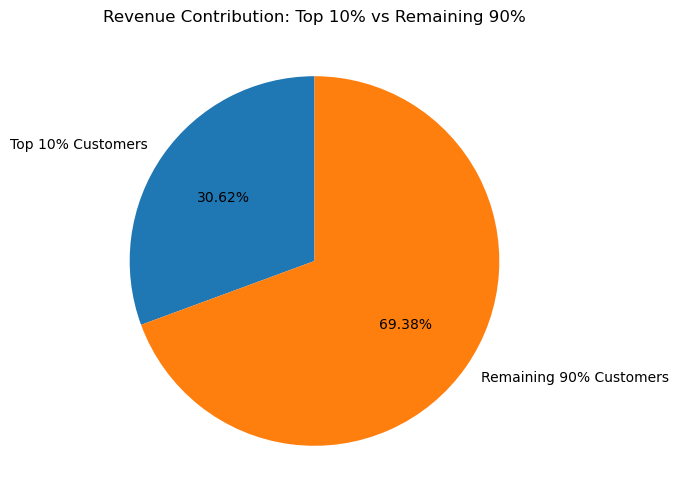

In [22]:



customer_sales = df.groupby("Customer ID")["Sales"].sum().reset_index()
customer_sales = customer_sales.sort_values(by="Sales", ascending=False)


top_10_count = int(0.10 * len(customer_sales))
top_customers = customer_sales.head(top_10_count)


top_contribution = top_customers["Sales"].sum()
total_revenue = customer_sales["Sales"].sum()
other_contribution = total_revenue - top_contribution

labels = ["Top 10% Customers", "Remaining 90% Customers"]
sizes = [top_contribution, other_contribution]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Revenue Contribution: Top 10% vs Remaining 90%")
plt.show()

In [4]:
customer_df = df.groupby('Customer ID').agg({
    'Sales': 'sum'
}).reset_index()

customer_df.rename(columns={'Sales': 'Total_Spend'}, inplace=True)

In [9]:
def segment_customer(spend):
    if spend >= 5000:
        return 'High Value'
    elif spend >= 1000:
        return 'Regular'
    else:
        return 'Low Value'

customer_df['Segment'] = customer_df['Total_Spend'].apply(segment_customer)

In [10]:
customer_df.head()

,Customer ID,Total_Spend,Segment
0,AA-10315,5563.560,High Value
1,AA-10375,1056.390,Regular
2,AA-10480,1790.512,Regular
3,AA-10645,5086.935,High Value
4,AB-10015,886.156,Low Value


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [12]:
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year

In [13]:
monthly_sales = df.groupby('Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_sales

Month
January       94924.8356
February      59751.2514
March        205005.4888
April        137762.1286
May          155028.8117
June         152718.6793
July         147238.0970
August       159044.0630
September    307649.9457
October      200322.9847
November     352461.0710
December     325293.5035
Name: Sales, dtype: float64

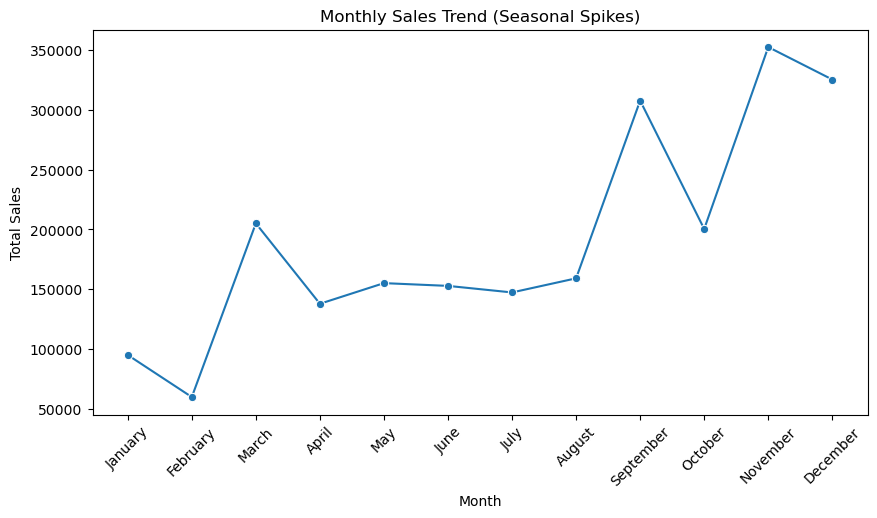

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend (Seasonal Spikes)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()